# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist 


# Getting Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

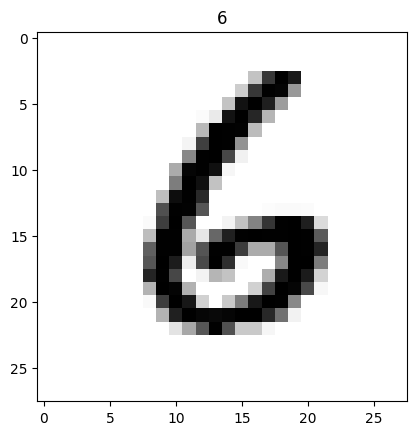

In [ ]:
def plot_img(i):
  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

plot_img(6000)

# Pre-Processing Data

In [ ]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Model Training

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(10,activation = "softmax"))



In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
cnn.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 25, validation_split=0.3)

Epoch 1/25
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0073 - accuracy: 0.9973 - val_loss: 0.0544 - val_accuracy: 0.9898
Epoch 2/25
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0536 - val_accuracy: 0.9896
Epoch 3/25
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0468 - val_accuracy: 0.9912
Epoch 4/25
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0533 - val_accuracy: 0.9899
Epoch 5/25
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0472 - val_accuracy: 0.9907
Epoch 6/25
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0491 - val_accuracy: 0.9908
Epoch 7/25
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0448 -

# Evaluating Test samples and Checking accuracy 

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0415 - accuracy: 0.9927


In [ ]:
print("Validation accuracy on 10,000 test samples : ", test_acc)

Validation accuracy on 10,000 test samples :  0.9926999807357788
